# 第十二次课后练习

**负责助教：朱轩宇**

<span style="color:red; font-weight:bold;">请将作业文件命名为 第十二次课后练习+姓名+学号.ipynb, 例如 第十二次课后练习+张三+1000000000.ipynb</span>

<span style="color:red; font-weight:bold;">在作业过程中觉得有心得或者自己拓展学习到有价值内容的，可以在文件名最后加一个#号。例如第十二次课后练习+张三+1000000000+#.ipynb</span>

<span style="color:red; font-weight:bold;">本次课同时发布课后练习和选做题，提交时请注意区分提交通道</span>

# 第零部分 代码理解

请认真阅读代码，理解代码的功能，先写出预想的结果。运行并检验结果是否如预期。如果不如预期，请分析理解其中的原因

## **0.1** 社交网络基础图构建与可视化
    阅读下面代码，观察运行的结果，解释出现这个结果的原因。

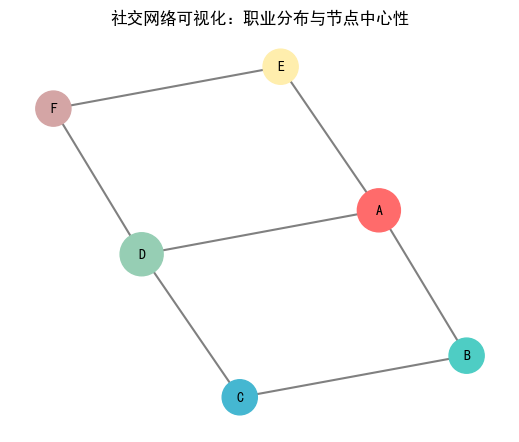

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# 设置字体为黑体
plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决负号显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False

# 1. 数据准备
edges_df = pd.DataFrame({
    'source': ['A', 'B', 'C', 'D', 'A', 'E', 'F'],
    'target': ['B', 'C', 'D', 'A', 'E', 'F', 'D']
})
nodes_df = pd.DataFrame({
    'user': ['A', 'B', 'C', 'D', 'E', 'F'],
    'occupation': ['学生', '工程师', '设计师', '教师', '医生', '自由职业']
})

# 2. 构建无向图
G = nx.Graph()

# 3. 添加节点与边
G.add_edges_from(list(zip(edges_df['source'], edges_df['target']))) # 重要！

# 4. 添加节点属性（职业）
for _, row in nodes_df.iterrows():
    G.nodes[row['user']]['occupation'] = row['occupation'] 
# 可以添加节点属性!!!

# 5. 可视化设计
plt.figure(figsize=(5, 4))
pos = nx.spring_layout(G, seed=42) # 设置布局，spring_layout：模拟弹簧力学
# spring_layout：节点位置根据弹簧力学算法计算
# 这里的seed参数是为了让每次运行时图形位置一致
# 这里的布局算法会根据节点之间的连接关系自动调整节点位置

# 6. 根据节点度中心性设置节点大小
node_degree = dict(nx.degree_centrality(G))  
node_size = [v * 1600 for v in node_degree.values()]
# 节点度中心性=节点入度/(节点总数-1)
# 这里乘以1600是为了放大节点大小，便于观察

# 7. 根据职业设置节点颜色
occupation_color = {
    '学生': '#FF6B6B', '工程师': '#4ECDC4', 
    '设计师': '#45B7D1', '教师': '#96CEB4',
    '医生': '#FFEEAD', '自由职业': '#D4A5A5'
}
node_color = [occupation_color[G.nodes[n]['occupation']] for n in G.nodes()]

# 8. 绘制网络图
nx.draw(G, pos, with_labels=True, node_size=node_size, node_color=node_color, 
        edge_color='grey', width=1.5, font_size=10, font_weight='bold')
plt.title("社交网络可视化：职业分布与节点中心性")
plt.axis('off')
plt.show()

解释在注释中。

## **0.2** 社交网络关键节点识别与中心性对比
    阅读下面代码，观察运行的结果，解释出现这个结果的原因。

/var/folders/hn/gy9cbfnj2fxdtcx87x8ptv_w0000gn/T/ipykernel_29288/2283520204.py:105: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=2.0)


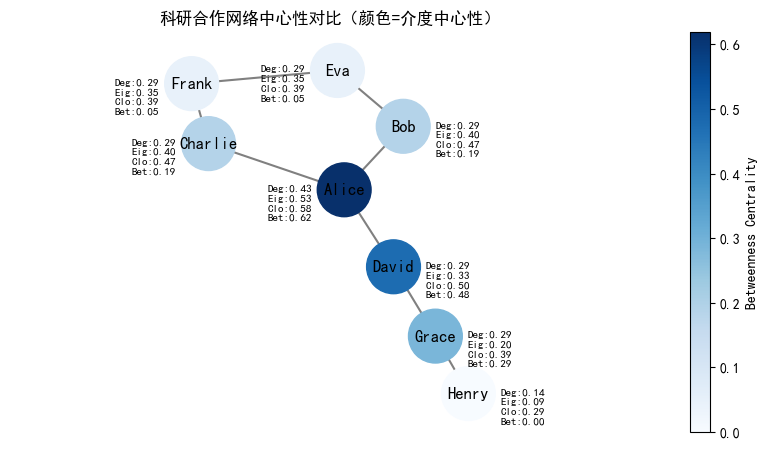

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# 1. 构建科研合作网络
G = nx.Graph()
edges = [
    ("Alice", "Bob"), ("Alice", "Charlie"), ("Alice", "David"),
    ("Bob", "Eva"), ("Charlie", "Frank"), ("David", "Grace"),
    ("Eva", "Frank"), ("Grace", "Henry")
]
G.add_edges_from(edges)

# 2. 计算四种中心性指标
# ----------------------------
# 点度中心度（直接连接数）
degree_centrality = nx.degree_centrality(G)
# 点度中心度=节点入度/(节点总数-1)

# 特征向量中心度（邻居节点重要性）
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=100)
# 特征向量中心度=邻接矩阵主特征值对应的特征向量在节点上的分布
# max_iter=100表示迭代次数，避免死循环
"""以下是手动实现（幂迭代法）
import numpy as np

def eigenvector_centrality(A, max_iter=100, tol=1e-6):
    n = A.shape[0]
    v = np.ones(n) / n  # 初始向量
    for _ in range(max_iter):
        v_new = A @ v  # 矩阵乘法
        v_new = v_new / np.linalg.norm(v_new)  # 归一化
        if np.linalg.norm(v_new - v) < tol:
            break
        v = v_new
    return v

A = np.array([[0, 1, 1],
              [1, 0, 0],
              [1, 0, 0]])
centrality = eigenvector_centrality(A)
print("特征向量中心度:", centrality)
"""

# 接近中心度（到其他节点的平均距离）
closeness_centrality = nx.closeness_centrality(G)
# 接近中心度=1/平均最短路径长度。衡量一个节点到网络中所有其他节点的平均最短路径长度的倒数。值越高，表示该节点越能快速到达其他节点（即处于网络的“中心”位置）。

# 介度中心度（桥接不同社区的能力）
betweenness_centrality = nx.betweenness_centrality(G, normalized=True)
# 介度中心度=节点在最短路径中出现的频率。衡量一个节点在所有最短路径中出现的频率。值越高，表示该节点作为“桥梁”连接不同子网络的能力越强。

# 3. 结果对比与可视化
plt.figure(figsize=(8, 4))
# 计算布局时增加缓冲区，设置更大的缩放比例让节点更靠近中心
pos = nx.spring_layout(G, seed=42, scale=1.5) # 设置布局，spring_layout：模拟弹簧力学

# 绘制网络图（颜色映射介度中心性）
node_color = list(betweenness_centrality.values())
# 设置画布大小，防止文字偏移出图片

nx.draw(G, pos, 
        with_labels=True, 
        node_size=1500,
        node_color=node_color, 
        cmap=plt.cm.Blues,
        edge_color='gray', 
        width=1.5)

# 添加中心性标注
labels = {n: f"Deg:{degree_centrality[n]:.2f}\nEig:{eigenvector_centrality[n]:.2f}\nClo:{closeness_centrality[n]:.2f}\nBet:{betweenness_centrality[n]:.2f}" 
          for n in G.nodes()}
# 智能调整标签位置，对于左侧节点向左偏移更多
labels_pos = {}
for n in G.nodes():
    # 根据节点x坐标动态调整水平偏移
    if pos[n][0] < 0:  # 左侧节点
        labels_pos[n] = (pos[n][0] - 0.15, pos[n][1] - 0.1)  # 左侧节点向左偏移更多
    elif pos[n][0] > 0:  # 右侧节点
        labels_pos[n] = (pos[n][0] + 0.15, pos[n][1] - 0.1)  # 右侧节点向右偏移
    else:  # 中间节点
        labels_pos[n] = (pos[n][0], pos[n][1] - 0.15)  # 中间节点向下偏移

nx.draw_networkx_labels(G, labels_pos, labels=labels, font_size=8, font_color='black')

# 创建规范化器，范围与节点颜色值对应
norm = colors.Normalize(vmin=min(betweenness_centrality.values()), 
                       vmax=max(betweenness_centrality.values()))


plt.title("科研合作网络中心性对比（颜色=介度中心性）")
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=norm), 
             ax=plt.gca(), 
            label="Betweenness Centrality")

# 设置坐标轴范围，确保有足够空间显示标签
x_values = [pos[node][0] for node in G.nodes()]
y_values = [pos[node][1] for node in G.nodes()]
x_margin = 0.5  # 水平边距
y_margin = 0.3  # 垂直边距
plt.xlim(min(x_values) - x_margin, max(x_values) + x_margin)
plt.ylim(min(y_values) - y_margin, max(y_values) + y_margin)

# 应用紧凑布局
plt.tight_layout(pad=2.0)
plt.axis('off')
plt.show()

## **0.3** PageRank算法

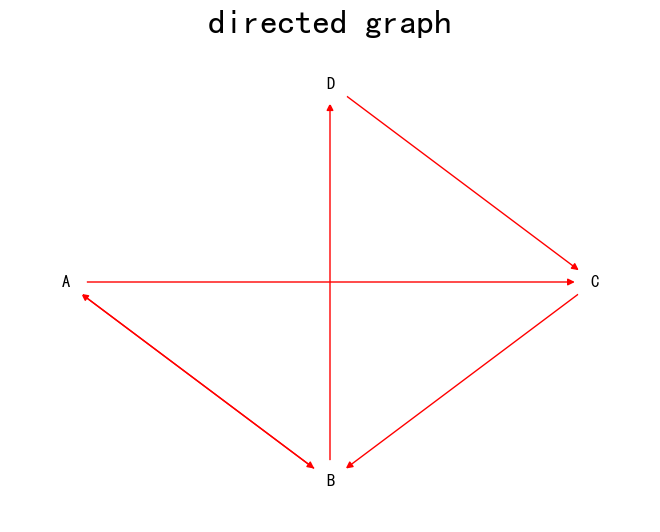

PageRank: {'A': 0.18669946835938991, 'B': 0.35105903526129834, 'C': 0.2755420280199218, 'D': 0.18669946835938991}
HITS Hubs: {'A': 0.5, 'B': -7.65915098552508e-17, 'C': 0.25000000000000006, 'D': 0.25}
HITS Authorities: {'A': -1.5700924586837752e-16, 'B': 0.5000000000000001, 'C': 0.5, 'D': 3.8262261578759094e-18}


'B、C节点可能会有较高的PageRank值，因为它们都被多个节点指向（入度均为2）'

In [3]:
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt
import pylab
# 创建有向图
G = nx.DiGraph()

# 有向图之间边的关系
edges = [("A", "B"), ("A", "C"), ("B", "A"), ("B", "D"), ("C", "B"), ("D", "C")]

for edge in edges:
     G.add_edge(edge[0], edge[1])


pos=nx.shell_layout(G) # 使用shell_layout布局绘制有向图。
nx.draw(G,pos,with_labels=True, node_color='white', edge_color='red', node_size=800, alpha=1 )
pylab.title('directed graph',fontsize=25)
pylab.show()

# pagerank算法
pagerank = nx.pagerank(G, alpha=0.85) # alpha参数(0.85)是阻尼系数，表示用户继续点击链接的概率
print("PageRank:", pagerank)

# HITS算法
"""HITS算法
对每个节点，都计算hub值和authority值
hub值高的节点指向许多权威节点
authority值高的节点被许多hub节点指向
"""
hubs, authorities = nx.hits(G)
print("HITS Hubs:", hubs)
print("HITS Authorities:", authorities)

"""B、C节点可能会有较高的PageRank值，因为它们都被多个节点指向（入度均为2）"""

## **0.4** 最短路
    阅读下面代码，观察运行的结果，解释出现这个结果的原因。

A到E的最短路径及距离: (['A', 'C', 'D', 'E'], 7)
A到所有节点距离: {'A': 0, 'B': 3, 'C': 2, 'D': 3, 'E': 7}
全源最短距离矩阵:
 [[ 0.  3.  2.  3.  7.]
 [inf  0. inf  5.  9.]
 [inf inf  0.  1.  5.]
 [inf inf inf  0.  4.]
 [inf inf inf inf  0.]]


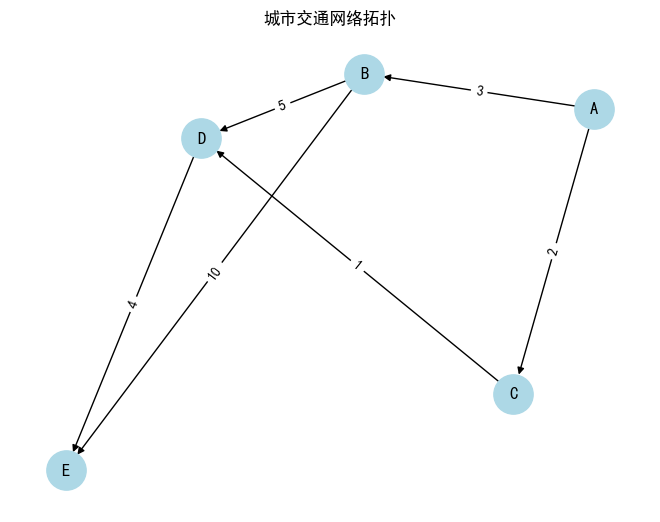

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# 1. 构建带权交通网络
G = nx.DiGraph()
edges = [
    ("A", "B", 3), ("A", "C", 2), ("B", "D", 5),
    ("C", "D", 1), ("D", "E", 4), ("B", "E", 10)
]
G.add_weighted_edges_from(edges)

# 2. 点对最短路（Dijkstra算法）
def point_to_point_shortest(graph, start, end):
    try:
        path = nx.shortest_path(graph, start, end, weight='weight') 
        length = nx.shortest_path_length(graph, start, end, weight='weight')
        return path, length
    except nx.NetworkXNoPath:
        return "不可达", float('inf')

# 3. 单源最短路（Bellman-Ford算法）
def single_source_shortest(graph, start):
    try:
        lengths = nx.single_source_bellman_ford_path_length(graph, start, weight='weight')
        return lengths
    except nx.NetworkXUnbounded:
        return "存在负权环"

# 4. 全图最短路（Floyd-Warshall算法）
def all_pairs_shortest(graph):
    return nx.floyd_warshall_numpy(graph, weight='weight')  

# 验证与可视化
print("A到E的最短路径及距离:", point_to_point_shortest(G, "A", "E"))  # 预期输出：(['A', 'C', 'D', 'E'], 7)
"""点对点最短路(Dijkstra)：计算A到E的最短路径"""

print("A到所有节点距离:", single_source_shortest(G, "A"))          # 预期输出：{'A':0, 'B':3, 'C':2, 'D':3, 'E':7}
"""单源最短路(Bellman-Ford)：计算从A出发到所有节点的距离"""

print("全源最短距离矩阵:\n", all_pairs_shortest(G))
"""全图最短路(Floyd-Warshall)：计算所有节点对的最短距离矩阵"""

# 绘制网络图（含权重标注）
pos = nx.spring_layout(G, seed=10)  # 布局算法
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("城市交通网络拓扑")
plt.show()


# 第一部分 基础练习

## **1.1** 基于networkx建图

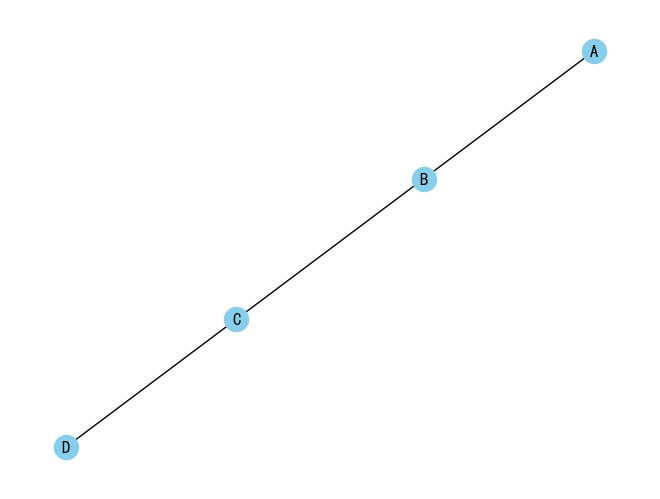

In [5]:
import networkx as nx
import pandas as pd

# 任务1：初始化无向图对象
graph = nx.Graph()  # 填空1（创建空图对象）

# 任务2：添加三条边（A-B, B-C, C-D）
graph.add_edges_from([("A","B"), ("B","C"), ("C","D")])  # 填空2（边添加方法）
"""总结：
add_edges_from方法：添加多条边，参数为边的元组列表
add_edge方法：添加单条边，参数为两个节点的元组
add_node方法：添加单个节点，参数为节点名称
add_nodes_from方法：添加多个节点，参数为节点名称列表
"""
# 任务3：设置可视化参数
pos = nx.spring_layout(graph, seed=42)  # 布局算法
nx.draw(graph, pos, with_labels=True, node_color='skyblue')  # 填空3（节点颜色参数）

# 任务4：从DataFrame添加边
edges_data = pd.DataFrame({
    'from': ['X', 'Y', 'Z'], 
    'to': ['Y', 'Z', 'X']
})
graph.add_edges_from(list(zip(edges_data['from'], edges_data['to'])))  # 填空4（提取边元组列表）

# 任务5：添加孤立节点
graph.add_node("F")  # 填空5（添加单个节点）

## **1.2** Centrality代码填空题

In [10]:
import networkx as nx

# 任务1：计算点度中心性
def compute_degree_centrality(graph):
    return nx.degree_centrality(graph)  # 填空1

# 任务2：计算特征向量中心性（需处理可能的收敛问题）
def compute_eigenvector_centrality(graph):
    return nx.eigenvector_centrality(graph, max_iter=100)  # 填空2

# 任务3：计算归一化接近中心性
def compute_closeness_centrality(graph):
    return nx.closeness_centrality(graph, normalized=True)  # 填空3

# 任务4：计算非归一化介度中心性
def compute_betweenness_centrality(graph):
    return nx.betweenness_centrality(graph, normalized=False)  # 填空4

# 任务5：综合排序输出
G = nx.star_graph(5)  # 星型图（中心节点0）
centralities = {
    "Degree": compute_degree_centrality(G),
    "Eigenvector": compute_eigenvector_centrality(G),
    "Betweenness": compute_betweenness_centrality(G)
}
result = {}
for metric, values in centralities.items():
    result[metric] = max(values, key=values.get)  # 取最大值
    print(f"{metric} Top Node: {max(values, key=values.get)}")

Degree Top Node: 0
Eigenvector Top Node: 0
Betweenness Top Node: 0


In [11]:
assert result == {'Degree': 0, 'Eigenvector': 0, 'Betweenness': 0}, "测试失败！"

## **1.3** PageRank算法

In [12]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

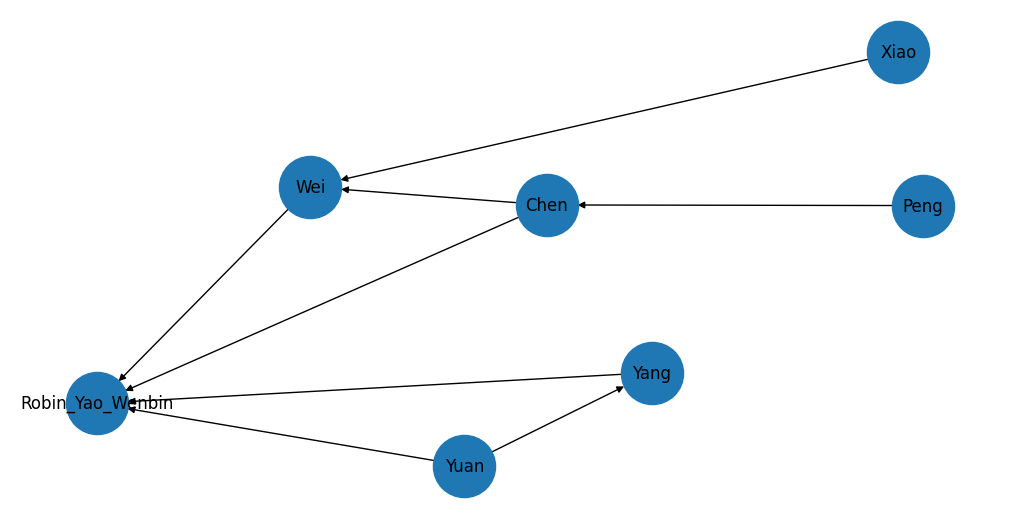

{'Robin_Yao_Wenbin': 0.388574127542953,
 'Wei': 0.1808805050797985,
 'Yang': 0.09777335555004255,
 'Yuan': 0.06861265036356039,
 'Xiao': 0.06861265036356039,
 'Chen': 0.12693406073652472,
 'Peng': 0.06861265036356039}

In [13]:
plt.figure(figsize=(10,5))

G = nx.DiGraph()
G.add_nodes_from(['Robin_Yao_Wenbin','Wei','Yang','Yuan','Xiao','Chen','Peng'])    #加点集合
G.add_edge('Wei' ,'Robin_Yao_Wenbin' )   #一次添加一条边
G.add_edge('Yang' ,'Robin_Yao_Wenbin' )   #一次添加一条边
G.add_edge('Yuan' ,'Robin_Yao_Wenbin' )   #一次添加一条边
G.add_edge('Chen' ,'Robin_Yao_Wenbin' )   #一次添加一条边
G.add_edge('Peng' ,'Chen' )   #一次添加一条边
G.add_edge('Xiao' ,'Wei' )   #一次添加一条边
G.add_edge('Chen' ,'Wei' )   #一次添加一条边
G.add_edge('Yuan' ,'Yang' )   #一次添加一条边
nx.draw(G, with_labels=True , node_size = 2000)
plt.show()

# 计算PageRank
pr = nx.pagerank(G, alpha=0.85)  # 填空：计算PageRank,alpha为阻尼系数，通常设置为0.85
pr

In [14]:
assert pr['Robin_Yao_Wenbin'] > pr['Wei'] > pr['Chen'] > pr['Yang'] > pr['Yuan'] == pr['Peng'] == pr['Xiao'], "PageRank排序错误"

## **1.4** 最短路

小明到小美的最优路径: ['小明', '小红', '小芳', '小美']
小红的社交圈距离: {'小红': 0, '小芳': 2, '小美': 6}


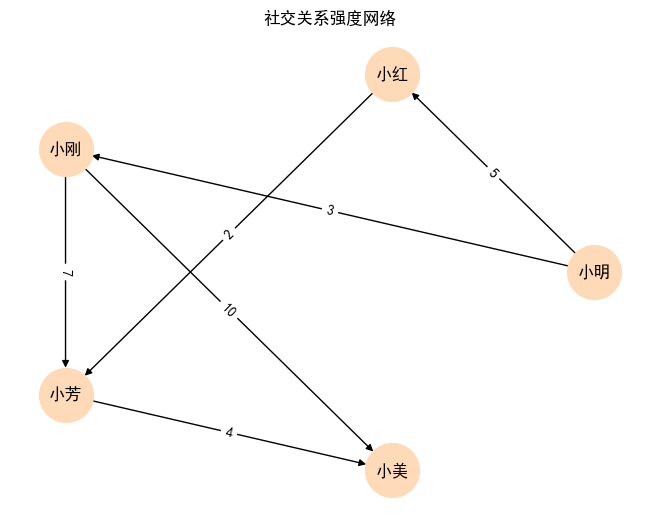

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 1. 构建社交关系网络（填空1）
G = nx.DiGraph()  # 创建有向图对象
# 有向图是DiGraph()，无向图是Graph()!!!!!!

edges = [
    ("小明", "小红", {"weight":5}), 
    ("小明", "小刚", {"weight":3}), 
    ("小红", "小芳", {"weight":2}),
    ("小刚", "小芳", {"weight":7}),
    ("小芳", "小美", {"weight":4}),
    ("小刚", "小美", {"weight":10})
]
G.add_edges_from(edges)  # 填空3：添加带属性边

# 2. 亲密路径计算（填空4）
def find_closest_friend(graph, start):
    try:
        return nx.single_source_bellman_ford_path_length(graph, start, weight='weight')  # 填空5：单源最短路算法
    except nx.NetworkXUnbounded:
        return "存在异常关系链"

# 3. 验证与可视化
xm2xm = nx.shortest_path(G, "小明", "小美", weight='weight')  # 填空6：计算小明到小美的最短路径长度
print("小明到小美的最优路径:", nx.shortest_path(G, "小明", "小美", weight='weight'))  # 填空6
xh_closest = find_closest_friend(G, "小红")
print("小红的社交圈距离:", xh_closest)

# 绘制关系网络图（填空7）
pos = nx.circular_layout(G)  # 填空8：圆形布局
nx.draw(G, pos, with_labels=True, node_color='peachpuff', node_size=1500)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))
plt.title("社交关系强度网络")
plt.show()

In [18]:
assert xh_closest == {'小红': 0, '小芳': 2, '小美': 6}, "单源最短路算法计算结果不正确"
assert xm2xm == ['小明', '小红', '小芳', '小美'], "最优路径计算结果不正确"

# 第二部分 进阶练习

## **2.1** 手写PageRank算法
使用随机冲浪模型
公式
$
R_k = d \times AR_{k-1} + \frac{(1 - d)}{N} \times \alpha
$

In [8]:
import numpy as np
def pagerank(M, d=0.8, tol=1e-8, max_iter=1000):
    """PageRank的迭代算法
    :param M: 转移概率矩阵
    :param d: 阻尼因子
    :param tol: 容差
    :param max_iter: 最大迭代次数
    :return: PageRank值（平稳分布）
    """
    n_components = len(M)

    # 初始状态分布：均匀分布
    pr0 = np.array([1 / n_components] * n_components)
    ##############################
    # TODO
    for i in range(max_iter):
        pr_new = d * M @ pr0 + (1 - d) / n_components
        if np.linalg.norm(pr_new - pr0, ord = 1) < tol: break
        pr0 = pr_new
    # 迭代更新PageRank值
    ##############################
    return pr0

np.set_printoptions(precision=2, suppress=True)
P = np.array([[0, 1 / 2, 0, 0],
               [1 / 3, 0, 0, 1 / 2],
               [1 / 3, 0, 1, 1 / 2],
               [1 / 3, 1 / 2, 0, 0]])

result = pagerank(P)
print(result)

[0.1  0.13 0.64 0.13]


In [20]:
# 用assert判断result保留三位小数是否正确
assert np.allclose(result, [0.1014, 0.1284, 0.6419, 0.1284], atol=1e-3), "PageRank计算错误"

## **2.2** 航空公司航线网络分析系统

假设你是一家航空公司的数据分析师，需要分析公司的航线网络结构，帮助管理层做出优化决策。请完成以下代码框架，实现航线网络分析系统。

填空答案提示：
- 创建有向图对象
- 从航线数据中获取距离信息
- 计算边的重要性指标（航班数/距离）
- 获取图的边数量
- 获取图的节点数量
- 找出介度中心性最高的节点
- 计算图的平均最短路径长度
- 使用社区发现算法
- 选择适合的网络布局算法
- 使用已计算的边宽度变量
- 使用最短路径算法

请完成代码中的填空，然后运行分析整个航空网络的结构特征，找出最重要的中转城市，发现航线的自然聚类，以及推荐最优的航线连接方案。

=== 航线网络分析报告 ===
总航线数: 21
覆盖城市数: 8
最重要的中转城市: 杭州
平均最短飞行距离: 1481.07km
发现的航线区域集群: 3个


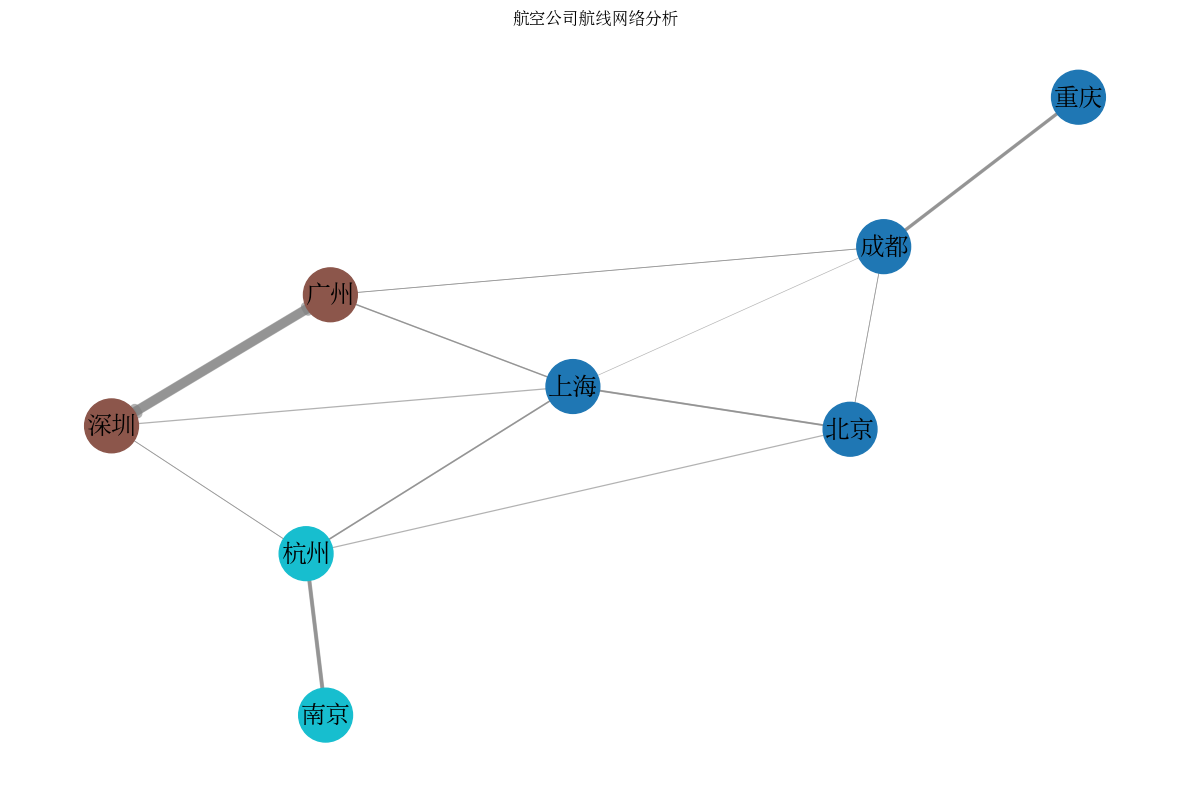


=== 航线推荐 (北京 → 广州) ===
最短距离: 北京 → 杭州 → 深圳 → 广州 (2020km)
最少中转: 北京 → 上海 → 广州 (2次中转)
综合最优: 北京 → 上海 → 广州


In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from networkx.algorithms.community import greedy_modularity_communities

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 1. 数据准备与图构建
# 航线数据：出发城市、到达城市、距离(km)、每日航班数
flight_data = pd.DataFrame({
    'source': ['北京', '上海', '广州', '成都', '深圳', '杭州', '北京', '上海', '广州', '成都', '深圳',
              '上海', '广州', '深圳', '重庆', '杭州', '南京', '成都', '杭州', '成都', '北京', '上海'],
    'target': ['上海', '广州', '深圳', '重庆', '杭州', '南京', '成都', '杭州', '成都', '北京', '上海',
              '北京', '上海', '广州', '成都', '深圳', '杭州', '北京', '上海', '广州', '杭州', '成都'],
    'distance': [1100, 1200, 140, 300, 980, 170, 1800, 760, 1200, 1800, 1200,
                1100, 1200, 140, 300, 980, 170, 1800, 760, 1200, 900, 1500],
    'flights_per_day': [30, 25, 20, 15, 12, 10, 20, 18, 15, 20, 22,
                       25, 20, 18, 12, 10, 8, 18, 15, 13, 16, 14]
})

# 构建有权图
G = nx.DiGraph()

# 添加边与权重
for _, row in flight_data.iterrows():
    # 添加边及其属性
    G.add_edge(
        row['source'], 
        row['target'], 
        distance=row['distance'],
        flights=row['flights_per_day'],
        # 计算边的重要性指标(航班数/距离)
        importance=row['flights_per_day'] / row['distance']  # 计算边重要性指标
    )

# 2. 基本网络特征分析
def analyze_network_features(graph):
    print("=== 航线网络分析报告 ===")
    print(f"总航线数: {graph.number_of_edges()}")  # 填空4：获取边数量
    print(f"覆盖城市数: {graph.number_of_nodes()}")  # 填空5：获取节点数量
    
    # 计算中心性指标
    degree = nx.degree_centrality(graph)
    betweenness = nx.betweenness_centrality(graph, weight='distance')# 填空6：计算介度中心性
    
    # 找出最重要的中转城市
    hub_city = max(betweenness, key=betweenness.get)  # 找出介度中心性最高的节点
    print(f"最重要的中转城市: {hub_city}")
    
    # 计算平均最短路径长度
    avg_path = nx.average_shortest_path_length(graph, weight='distance')  # 填空7：计算图的平均最短路径长度，使用distance作为权重
    print(f"平均最短飞行距离: {avg_path:.2f}km")
    
    return degree, betweenness

# 3. 社区发现与航线聚类
def detect_route_communities(graph):
    # 使用模块度优化方法进行社区划分
    communities = list(greedy_modularity_communities(graph))  # 填空8：使用greedy_modularity_communities算法
    
    # 将社区信息添加到节点
    community_dict = {}
    for i, comm in enumerate(communities):
        for node in comm:
            community_dict[node] = i
    
    nx.set_node_attributes(graph, community_dict, 'community')
    return communities

# 4. 航线网络可视化
def visualize_network(graph, communities):
    plt.figure(figsize=(12, 8))
    
    # 设置节点位置
    pos = nx.spring_layout(graph, seed=42) 
    
    # 设置节点颜色基于社区
    node_colors = [graph.nodes[node]['community'] for node in graph.nodes()]
    
    # 设置边的宽度基于importance
    edge_widths = [graph[u][v]['importance']*50 for u, v in graph.edges()]
    
    # 绘制节点
    nx.draw_networkx_nodes(graph, pos, node_color=node_colors, 
                          node_size=1500, cmap=plt.cm.tab10)

    # 绘制边
    nx.draw_networkx_edges(graph, pos, width=edge_widths, 
                          edge_color='gray', alpha=0.6)  # 填空10：边宽度变量
    
    # 绘制标签
    nx.draw_networkx_labels(graph, pos, font_size=18, font_family='SimHei')
    
    plt.title("航空公司航线网络分析")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# 5. 航线推荐系统（寻找最优连接）
def recommend_connections(graph, start_city, end_city):
    if not (start_city in graph.nodes and end_city in graph.nodes):
        return "指定城市不存在于网络中"
    
    try:
        # 计算最短距离路径
        shortest_path = nx.shortest_path(graph, start_city, end_city, weight='distance')  # 填空11：最短路径算法
        total_distance = sum(graph[shortest_path[i]][shortest_path[i+1]]['distance'] 
                           for i in range(len(shortest_path)-1))
        
        # 计算最少中转路径
        min_hops_path = nx.shortest_path(graph, start_city, end_city)
        
        # 计算综合最优路径（考虑距离和航班数）
        # 使用importance作为权重的倒数
        best_path = nx.shortest_path(graph, start_city, end_city, 
                                   weight=lambda u, v, d: 1/d['importance'])
        
        return {
            "shortest_distance": {"path": shortest_path, "total_km": total_distance},
            "min_hops": {"path": min_hops_path, "hops": len(min_hops_path)-1},
            "best_overall": {"path": best_path}
        }
    except nx.NetworkXNoPath:
        return "没有可行路径连接这两个城市"


# 分析网络特征
degree, betweenness = analyze_network_features(G)

# 发现航线社区
communities = detect_route_communities(G)
print(f"发现的航线区域集群: {len(communities)}个")

# 可视化网络
visualize_network(G, communities)

# 示例：推荐从北京到广州的最佳航线
recommendations = recommend_connections(G, "北京", "广州")
print("\n=== 航线推荐 (北京 → 广州) ===")
print(f"最短距离: {' → '.join(recommendations['shortest_distance']['path'])} "
        f"({recommendations['shortest_distance']['total_km']}km)")
print(f"最少中转: {' → '.join(recommendations['min_hops']['path'])} "
        f"({recommendations['min_hops']['hops']}次中转)")
print(f"综合最优: {' → '.join(recommendations['best_overall']['path'])}")

In [27]:
assert np.allclose(recommendations['shortest_distance']['total_km'], 2020, atol=1e-2), "最短距离计算错误"
assert recommendations['min_hops']['hops'] == 2, "最少中转计算错误"
assert recommendations['best_overall']['path'] == ['北京', '上海', '广州'], "综合最优路径计算错误"